# Capstone Project -  Battle of the neighbourhoods


### Distribution solution for milk delivery to Restaurants/Cafes in Scarborough, Toronto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df1 = pd.read_csv('Toronto_data')

In [4]:
df1.drop(['Unnamed: 0'] , axis = 1 , inplace = True )

In [5]:
df1.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,West Hill,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


As we are interested in exploring only Downtown Toronto, lets create a data frame with all its neighbourhoods

In [6]:
df_Scarborough = df1[df1['Borough'] == 'Scarborough']

In [7]:
df_Scarborough.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,West Hill,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Create a Map of Scarborough and Its Neighbourhoods

In [8]:
# Getting co-ordinates of Toronto from geopy
address1 = 'Scarborough, Toronto'
geolocator = Nominatim()
locSB = geolocator.geocode(address1)
latSB = locSB.latitude
lonSB = locSB.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latSB, lonSB))


/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Scarborough are 43.773077, -79.257774.


In [9]:
map_SB = folium.Map(location=[latSB, lonSB], zoom_start=11.5)

# add markers to map
for lat, lng, label in zip(df_Scarborough['Latitude'], df_Scarborough['Longitude'], df_Scarborough['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color ='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map_SB)  
    
map_SB


## Explore Neighbourhoods of Scarborough

In [10]:
def foursquare_explore (postal_code_list, neighborhood_list, lat_list, lng_list, LIMIT = 500, radius = 1000):
    result_ds = []
    counter = 0
    for postal_code, neighborhood, lat, lng in zip(postal_code_list, neighborhood_list, lat_list, lng_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Postal Code'] = postal_code; tmp_dict['Neighborhood(s)'] = neighborhood; 
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        counter += 1
        
    return result_ds;

In [11]:
CLIENT_ID = 'ADG3ZXD3ROLMNTHU00E5F4XHVXWMMNQFUYB5DAIKPBENYQSA' # your Foursquare ID
CLIENT_SECRET = 'IK1MNCJN2OFQHAF5F0OZT5PJ1IDZBZDUEFQ4PAVP5P5FDX5C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [12]:
# Retriving data from foursquare api 

SB_Foursquare_Dataset = foursquare_explore(list(df_Scarborough['Postcode']),list(df_Scarborough['Neighbourhood']),
                           list(df_Scarborough['Latitude']),list(df_Scarborough['Longitude']),)

In [13]:
SB_Foursquare_Dataset[1]

{'Postal Code': 'M1C',
 'Neighborhood(s)': 'Highland Creek,Rouge Hill,Port Union',
 'Latitude': 43.7845351,
 'Longitude': -79.16049709999999,
 'Crawling_result': [{'reasons': {'count': 0,
    'items': [{'summary': 'This spot is popular',
      'type': 'general',
      'reasonName': 'globalInteractionReason'}]},
   'venue': {'id': '4b96e31cf964a5207deb34e3',
    'name': 'Shamrock Burgers',
    'location': {'address': '6070 Old Kingston Rd.',
     'lat': 43.78382252268771,
     'lng': -79.16840631604676,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.78382252268771,
       'lng': -79.16840631604676}],
     'distance': 640,
     'cc': 'CA',
     'city': 'Scarborough',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['6070 Old Kingston Rd.',
      'Scarborough ON',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d16c941735',
      'name': 'Burger Joint',
      'pluralName': 'Burger Joints',
      'shortName': 'Burgers',
      'icon': {'prefi

In [14]:
#extract details from foursquare dataset and save in dataframe

def get_venue_dataset(foursquare_dataset):
    result_df = pd.DataFrame(columns = ['Postcode', 'Neighbourhood', 
                                           'Neighbourhood Latitude', 'Neighbourhood Longitude','Venue_id',
                                          'Venue', 'Venue Category', 'Venue_lat' , 'Venue_lng'])
    # print(result_df)
    
    for neigh_dict in foursquare_dataset:
        postal_code = neigh_dict['Postal Code']; neigh = neigh_dict['Neighborhood(s)']
        lat = neigh_dict['Latitude']; lng = neigh_dict['Longitude']
    
        for venue_dict in neigh_dict['Crawling_result']:
            name = venue_dict['venue']['name']
            vlat = venue_dict['venue']['location']['lat']
            vlng = venue_dict['venue']['location']['lng']
            cat =  venue_dict['venue']['categories'][0]['name']
            vid = venue_dict['venue']['id']
            
            
            
          
            result_df = result_df.append({'Postcode': postal_code, 'Neighbourhood': neigh, 
                              'Neighbourhood Latitude': lat, 'Neighbourhood Longitude':lng,'Venue_id':vid,
                              'Venue': name,'Venue Category': cat, 'Venue_lat': vlat ,'Venue_lng': vlng }, 
                                ignore_index = True)
            
    return(result_df)

In [15]:
df_SB = get_venue_dataset(SB_Foursquare_Dataset)

In [16]:
df_SB.shape

(385, 9)

In [17]:
len(list(df_SB['Venue Category'].unique()))

115

In [18]:
df_SB['Venue Category'].unique()

array(['Spa', 'Caribbean Restaurant', 'Fast Food Restaurant',
       'Coffee Shop', 'Paper / Office Supplies Store', 'Hobby Shop',
       'Bus Station', 'Martial Arts Dojo', 'Auto Workshop',
       'Chinese Restaurant', 'Greek Restaurant',
       'Fruit & Vegetable Store', 'Gym', 'Bakery', 'Sandwich Place',
       'Burger Joint', 'Italian Restaurant', 'Breakfast Spot',
       'Playground', 'Fried Chicken Joint', 'Food & Drink Shop',
       'Liquor Store', 'Smoothie Shop', 'Pizza Place', 'Pharmacy',
       'Discount Store', 'Beer Store', 'Bank', 'Sports Bar',
       'Electronics Store', 'Bus Line', 'Supermarket',
       'Filipino Restaurant', 'Park', 'Indian Restaurant',
       'Hakka Restaurant', 'Athletics & Sports', 'Music Store',
       'Thai Restaurant', 'Wings Joint', 'Yoga Studio', 'Grocery Store',
       'Board Shop', 'Rental Car Location', 'Sporting Goods Shop',
       'Ice Cream Shop', 'Restaurant', 'Convenience Store',
       'Train Station', 'Japanese Restaurant', 'Bowling A

In [19]:
df_final = df_SB[(df_SB['Venue Category'].str.contains('Coffee')) | (df_SB['Venue Category'].str.contains('Restaurant')) 
                | (df_SB['Venue Category'].str.contains('Breakfast')) | (df_SB['Venue Category'].str.contains('Café'))
                | (df_SB['Venue Category'].str.contains('Bakery')) | (df_SB['Venue Category'].str.contains('Grocery'))]

In [20]:
df_final.head()

,Postcode,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue_id,Venue,Venue Category,Venue_lat,Venue_lng
1,M1B,"Malvern,Rouge",43.806686,-79.194353,4b914562f964a520d4ae33e3,Caribbean Wave,Caribbean Restaurant,43.798558,-79.195777
2,M1B,"Malvern,Rouge",43.806686,-79.194353,4b6718c2f964a5203f3a2be3,Harvey's,Fast Food Restaurant,43.800106,-79.198258
3,M1B,"Malvern,Rouge",43.806686,-79.194353,579a91b3498e9bd833afa78a,Wendy's,Fast Food Restaurant,43.802008,-79.198080
4,M1B,"Malvern,Rouge",43.806686,-79.194353,4b16e23bf964a520edbe23e3,Tim Hortons,Coffee Shop,43.802000,-79.198169
5,M1B,"Malvern,Rouge",43.806686,-79.194353,4bb6b9446edc76b0d771311c,Wendy's,Fast Food Restaurant,43.807448,-79.199056


In [21]:
df_final.shape

(163, 9)

In [22]:
len(list(df_final['Venue Category'].unique()))

35

In [23]:
map1 = folium.Map(location=[latSB, lonSB], zoom_start=11)
c=0
# add markers to map
for lat, lng, label in zip(df_final['Venue_lat'], df_final['Venue_lng'], df_final['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color ='red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map1)  
    c=c+1
    
    
map1


In [24]:
from sklearn.cluster import KMeans

In [25]:
df_kmeans = df_final[['Venue_lat' ,'Venue_lng']]

We will now try to cluster and visualize our data with different values of K and use **Silhouette Coefficient** for accuracy

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
sil = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n , random_state=0).fit(df_kmeans)
    label = kmeans.labels_
    sil.append(silhouette_score(df_kmeans, label, metric='euclidean'))
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n, sil[n-2]))
    


For n_clusters=2, The Silhouette Coefficient is 0.4010976248963884
For n_clusters=3, The Silhouette Coefficient is 0.5033882735481788
For n_clusters=4, The Silhouette Coefficient is 0.5094938106397492
For n_clusters=5, The Silhouette Coefficient is 0.5164653401561993
For n_clusters=6, The Silhouette Coefficient is 0.5232348359922512
For n_clusters=7, The Silhouette Coefficient is 0.5510735675113302
For n_clusters=8, The Silhouette Coefficient is 0.5676479743210102
For n_clusters=9, The Silhouette Coefficient is 0.5875320034995417
For n_clusters=10, The Silhouette Coefficient is 0.6074921736586862


From the above values of Silhouette Coefficient, we can see that with increase in value of k, the accuracy of the model increases. let us visualize the above Silhouette Coefficient scores in a scatter plot with n_clusters on the x axis

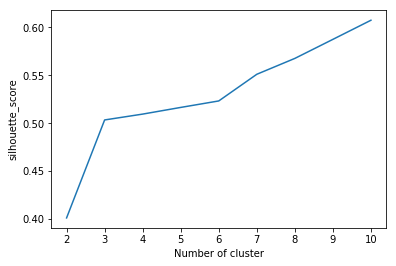

In [28]:
plt.figure()
plt.plot(list(range(2,11)), sil)
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_score")
plt.show()


Based on the above graph we can conclude :  the silhoutte score for k values between 8-10 are the best. Below we will visualize the clusters for k = 9. 

In [29]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_kmeans)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:5] 

array([3, 3, 3, 3, 3], dtype=int32)

In [30]:
df_final['Cluster Labels'] = kmeans.labels_

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
# create map
map_clusters = folium.Map(location=[latSB, lonSB], zoom_start=11)
d=0
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['Venue_lat'], df_final['Venue_lng'], df_final['Venue'], df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    d=d+1
       
        
map_clusters

## Thank You